## Observations and Insights 

In [197]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df=pd.merge(mouse_metadata,study_results, on="Mouse ID", how="outer")
# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [198]:
# Checking the number of mice
merge_df["Mouse ID"].count()

1893

In [199]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate =study_results[study_results.duplicated(['Mouse ID', 'Timepoint'])] 
duplicate["Mouse ID"]

137     g989
360     g989
681     g989
869     g989
1111    g989
Name: Mouse ID, dtype: object

In [200]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate =study_results[study_results.duplicated(['Mouse ID', 'Timepoint'])] 
duplicate 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
137,g989,0,45.000000,0
360,g989,5,47.570392,0
681,g989,10,49.880528,0
869,g989,15,53.442020,0
1111,g989,20,54.657650,1


In [201]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merge_df_drop=merge_df.drop_duplicates(['Mouse ID','Timepoint'], keep='first')
merge_df_drop

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [202]:
# Checking the number of mice in the clean DataFrame.
merge_df_drop["Mouse ID"].count()

1888

## Summary Statistics

In [203]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen                 
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean=round(merge_df_drop.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean(),2)
median=round(merge_df_drop.groupby('Drug Regimen')['Tumor Volume (mm3)'].median(),2)
variance=round(merge_df_drop.groupby('Drug Regimen')['Tumor Volume (mm3)'].var(),2)
standarDev=round(merge_df_drop.groupby('Drug Regimen')['Tumor Volume (mm3)'].std(),2)
sem=round(merge_df_drop.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem(),2)
# Assemble the resulting series into a single summary dataframe.
Summary_df=pd.DataFrame({"Mean":mean, "Median":median, "Variance": variance, "Standard Deviation": standarDev,"SEM":sem})
Summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

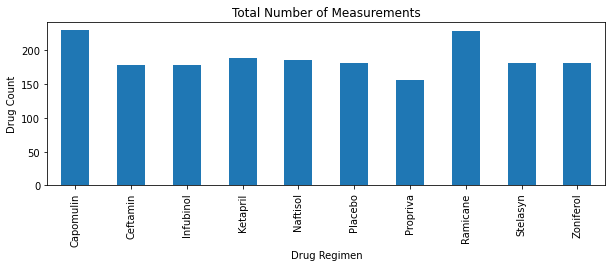

In [204]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
Reg_count=merge_df_drop.groupby('Drug Regimen')['Mouse ID'].count()
bar_chart=Reg_count.plot(kind='bar', figsize=(10,3))
bar_chart.set_xlabel("Drug Regimen")
bar_chart.set_ylabel("Drug Count")
plt.title('Total Number of Measurements')
plt.show()


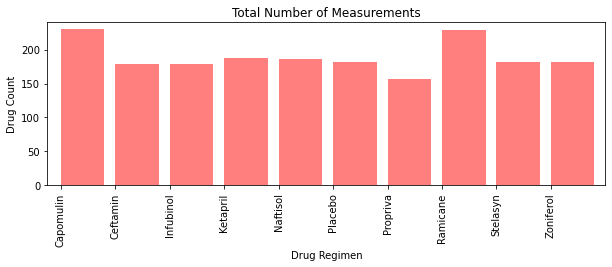

In [205]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
Reg_count=merge_df_drop.groupby('Drug Regimen')['Mouse ID'].count().reset_index()
x_axis=np.arange(len(Reg_count['Drug Regimen']))
tick_locations=[value for value in x_axis]
plt.figure(figsize=(10,3))
plt.bar(x_axis,Reg_count['Mouse ID'], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, Reg_count['Drug Regimen'], rotation="vertical")
plt.xlim(-0.25, len(x_axis))
plt.ylim(0,max(Reg_count['Mouse ID'])+10)
plt.title('Total Number of Measurements')
plt.xlabel("Drug Regimen")
plt.ylabel("Drug Count")
plt.show()

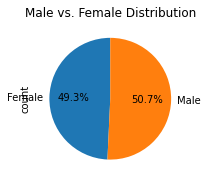

,Sex,count
0,Female,930
1,Male,958


In [206]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Gender_count=merge_df_drop.groupby('Sex').count().reset_index()
Gender_count=Gender_count[["Sex", "Mouse ID"]]
Gender_count=Gender_count.rename(columns={"Mouse ID":"count"})
ax1= plt.subplot(121, aspect='equal')
gender_pie=Gender_count.plot(kind='pie', y="count", title=("Male vs. Female Distribution"),ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=Gender_count['Sex'], legend = False, fontsize=10)

plt.show()

Gender_count

(-1.2203520276296485,
 1.113305319491944,
 -1.192629439242503,
 1.1121520273866432)

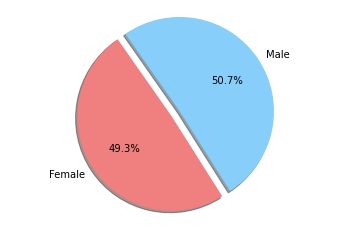

In [207]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Gender_count=merge_df_drop.groupby('Sex').count().reset_index()
labels=["Female", "Male"]
sizes=[930,958]
colors=["lightcoral", "lightskyblue"]
title=["Male vs. Female Distribution"]
explode=(0.1,0)
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct="%1.1F%%",shadow=True,startangle=125)
plt.axis('equal')

## Quartiles, Outliers and Boxplots

In [208]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
    # Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
maxmouse=merge_df_drop.groupby('Mouse ID')['Timepoint'].max().reset_index()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
maxmousemerge=pd.merge(maxmouse,merge_df, how='left', left_on=['Mouse ID','Timepoint'], right_on = ['Mouse ID','Timepoint'])
RegimenList=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
filter_drug=maxmousemerge[maxmousemerge['Drug Regimen'].isin(RegimenList)]
filter_drug

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
239,y769,45,Ceftamin,Female,6,27,68.594745,4
240,y793,45,Capomulin,Male,17,17,31.896238,2
241,y865,45,Ceftamin,Male,23,26,64.729837,3
245,z578,45,Ramicane,Male,11,16,30.638696,0


In [211]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Locate the rows which contain mice, on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds
Ramicane=[]
Infubinol=[]
Ceftamin=[]
Capomulin=[]
for i in filter_drug.index:
    Drug=filter_drug["Drug Regimen"][i]
    tumvol=filter_drug['Tumor Volume (mm3)'][i]
    mouseid=filter_drug['Mouse ID'][i]
    if Drug == "Ramicane":
        Ramicane.append(tumvol)
    if Drug  == "Infubinol":
        Infubinol.append(tumvol)
    if Drug  == "Ceftamin":
        Ceftamin.append(tumvol)    
    if Drug  == "Capomulin":
        Capomulin.append(tumvol)   
print(Ramicane)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Ramicane.sort()
Infubinol.sort()
Ceftamin.sort()
Capomulin.sort()
df = pd.DataFrame(list(zip(Ramicane, Infubinol, Ceftamin,Capomulin)), columns =['Ramicane', 'Infubinol','Ceftamin','Capomulin'])

Ramicane_quartiles=df['Ramicane'].quantile([.25,.50,.75])
Ramicane_lowerq=Ramicane_quartiles[.25]
Ramicane_upperq=Ramicane_quartiles[.75]
Ramicane_iqr=round((Ramicane_upperq-Ramicane_lowerq),2)
lower_bound_r = round((Ramicane_lowerq - (1.5*Ramicane_iqr)),2)
upper_bound_r = round((Ramicane_upperq + (1.5*Ramicane_iqr)),2)
print(f"The interquartile range of Ramicane is: {Ramicane_iqr}")
print(f"Ramicane's Values below {lower_bound_r} could be outliers.")
print(f"Ramicane's Values above {upper_bound_r} could be outliers.")
print(f"---------------------------------")   
Infubinol_quartiles=df['Infubinol'].quantile([.25,.50,.75])
Infubinol_lowerq=Infubinol_quartiles[.25]
Infubinol_upperq=Infubinol_quartiles[.75]
Infubinol_iqr=round((Infubinol_upperq-Infubinol_lowerq),2)
lower_bound_i = round((Infubinol_lowerq - (1.5*Infubinol_iqr)),2)
upper_bound_i = round((Infubinol_upperq + (1.5*Infubinol_iqr)),2)
print(f"The interquartile range of Infubinol is: {Infubinol_iqr}")
print(f"Infubinol's Values below {lower_bound_i} could be outliers.")
print(f"Infubinol's Values above {upper_bound_i} could be outliers.")
print(f"---------------------------------")   
Ceftamin_quartiles=df['Ceftamin'].quantile([.25,.50,.75])
Ceftamin_lowerq=Ceftamin_quartiles[.25]
Ceftamin_upperq=Ceftamin_quartiles[.75]
Ceftamin_iqr=round((Ceftamin_upperq-Ceftamin_lowerq),2)
lower_bound_c = round((Ceftamin_lowerq - (1.5*Ceftamin_iqr)),2)
upper_bound_c = round((Ceftamin_upperq + (1.5*Ceftamin_iqr)),2)
print(f"The interquartile range of Ceftamin is: {Ceftamin_iqr}")
print(f"Ceftamin's Values below {lower_bound_c} could be outliers.")
print(f"Ceftamin's Values above {upper_bound_c} could be outliers.") 
print(f"---------------------------------")   
Capomulin_quartiles=df['Capomulin'].quantile([.25,.50,.75])
Capomulin_lowerq=Capomulin_quartiles[.25]
Capomulin_upperq=Capomulin_quartiles[.75]
Capomulin_iqr=round((Capomulin_upperq-Capomulin_lowerq),2)
lower_bound_ca = round((Capomulin_lowerq - (1.5*Capomulin_iqr)),2)
upper_bound_ca = round((Capomulin_upperq + (1.5*Capomulin_iqr)),2)
print(f"The interquartile range of Stelasyn is: {Capomulin_iqr}")
print(f"Capomulin's Values below {lower_bound_ca} could be outliers.")
print(f"Capomulin's Values above {upper_bound_ca} could be outliers.") 

[38.407618299999996, 43.04754260000001, 38.81036633, 32.97852192, 38.34200823, 33.39765251, 37.31123552, 40.65900627, 29.12847181, 33.56240217, 36.37451039, 31.56046955, 36.13485243, 22.05012627, 30.56462509, 31.09533505, 45.22086888, 36.56165229, 37.22565033, 43.41938077, 30.27623175, 40.66771292, 43.16637266, 44.18345092, 30.63869575]
The interquartile range of Ramicane is: 9.1
Ramicane's Values below 17.91 could be outliers.
Ramicane's Values above 54.31 could be outliers.
---------------------------------
The interquartile range of Infubinol is: 11.48
Infubinol's Values below 36.83 could be outliers.
Infubinol's Values above 82.75 could be outliers.
---------------------------------
The interquartile range of Ceftamin is: 15.58
Ceftamin's Values below 25.35 could be outliers.
Ceftamin's Values above 87.67 could be outliers.
---------------------------------
The interquartile range of Stelasyn is: 7.78
Capomulin's Values below 20.71 could be outliers.
Capomulin's Values above 51.83 

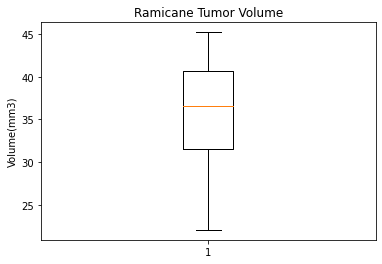

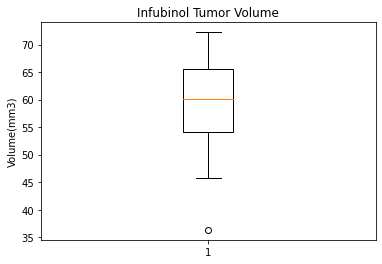

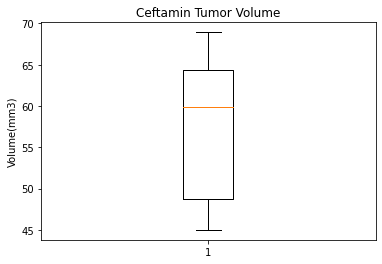

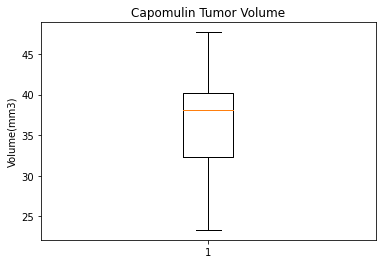

In [215]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Ramicane Box Plot
Ram_Tum_Vol=df['Ramicane']
fig1, ax1=plt.subplots()
ax1.set_title('Ramicane Tumor Volume')
ax1.set_ylabel('Volume(mm3)')
ax1.boxplot(Ram_Tum_Vol)
plt.show()
Inf_Tum_Vol=df['Infubinol']
fig1, ax1=plt.subplots()
ax1.set_title('Infubinol Tumor Volume')
ax1.set_ylabel('Volume(mm3)')
ax1.boxplot(Inf_Tum_Vol)
plt.show()
Cef_Tum_Vol=df['Ceftamin']
fig1, ax1=plt.subplots()
ax1.set_title('Ceftamin Tumor Volume')
ax1.set_ylabel('Volume(mm3)')
ax1.boxplot(Cef_Tum_Vol)
plt.show()
Cap_Tum_Vol=df['Capomulin']
fig1, ax1=plt.subplots()
ax1.set_title('Capomulin Tumor Volume')
ax1.set_ylabel('Volume(mm3)')
ax1.boxplot(Cap_Tum_Vol)
plt.show()

## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
